In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import motiflets.motiflets as mtfls
import motiflets.plotting as mtfls_plt
from tests.audio.lyrics import *
import motiflets_uni.motiflets as mtfls_uni
from motiflets_uni.plotting import Motiflets as Motiflets_uni
from sklearn.decomposition import PCA
import tests.amc.amc_parser as amc_parser
import time

/home/niyaz/Programme/miniconda3/envs/ubuntu-motiflets-mv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
k_max = 16
motif_length = 100
n_dims_rest = 25
n_dims_rest2 = 17

def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict


def exclude_body_joints(df):
    # Filter body joints as suggested by Yeh
    exclude = ['root', 'lowerback', 'upperback',
               'thorax', 'lowerneck', 'upperneck', 'head']
    exclude_bones = []
    exclude_bones.extend([x + "_" + k for x in exclude for k in 'xyz'])
    exclude_bones

    return df[~df.index.isin(exclude_bones)]


def include_joints(df, include, add_xyz=True):
    include_bones = []

    if add_xyz:
        include_bones.extend([x + "_" + k for x in include for k in 'xyz'])
    else:
        include_bones = include

    return df[df.index.isin(include_bones)]

amc_name = "13_17" #"Boxing Motions"
asf_path = "datasets/motion_data/13.asf"
amc_path = 'datasets/motion_data/' + amc_name + '.amc'

joints_to_use = ['rclavicle', 'rhumerus', 'rradius', 'rwrist',
             'rhand', 'rfingers', 'rthumb',
             'rfemur', 'rtibia', 'rfoot', 'rtoes']
add_xyz=True

joints = amc_parser.parse_asf(asf_path)
motions = amc_parser.parse_amc(amc_path)

df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions]).T
#df = exclude_body_joints(df)
print(df)
#df = include_joints(df, joints_to_use, add_xyz=add_xyz)
#print(df)
# print("Used joints:", joints_to_use)
# series = df.values
# print(f'DatensatzLänge: {series.shape[1]}')
# print(series.shape)


                  0          1          2          3          4          5     \
root_x        4.101890   4.113940   4.127430   4.144050   4.162250   4.184910   
root_y       17.518100  17.511900  17.508500  17.511000  17.523500  17.545900   
root_z       -3.866450  -3.837700  -3.807390  -3.776730  -3.745170  -3.713820   
lhipjoint_x   5.076812   5.078488   5.081993   5.091242   5.100829   5.108174   
lhipjoint_y  15.723790  15.721240  15.722408  15.728400  15.745231  15.768951   
...                ...        ...        ...        ...        ...        ...   
rfingers_y   19.180022  19.151890  19.157544  19.143299  19.170816  19.227377   
rfingers_z   -0.898867  -0.871628  -0.826570  -0.789275  -0.736242  -0.675225   
rthumb_x     -1.511833  -1.539144  -1.557586  -1.567575  -1.575803  -1.588518   
rthumb_y     18.997490  18.966512  18.970557  18.957488  18.987696  19.048148   
rthumb_z     -1.035693  -1.010968  -0.968368  -0.935545  -0.886563  -0.828951   

                  6        

In [3]:
motif_length = 100

k_all = range(2, 26)
times_list = [None, None]

for test_k in k_all:
    print(test_k)
    start = time.time()

    mtfls.runtime_test(test_k, df, motif_length)
    end = time.time()
    times_list.append(end-start)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [4]:
print(times_list)

[None, None, 14.275872468948364, 12.489547729492188, 13.838556289672852, 14.460891723632812, 13.243665933609009, 13.406863451004028, 14.79393720626831, 15.453687906265259, 14.91560959815979, 15.1437246799469, 16.440481662750244, 16.013614654541016, 17.259449005126953, 18.22551703453064, 18.598342418670654, 18.293434858322144, 19.414379596710205, 19.09253191947937, 20.49007773399353, 21.683790922164917, 21.935224056243896, 22.42333221435547, 23.74110698699951, 25.729482650756836]


/tmp/ipykernel_14031/136653714.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


26


<Figure size 1000x400 with 0 Axes>

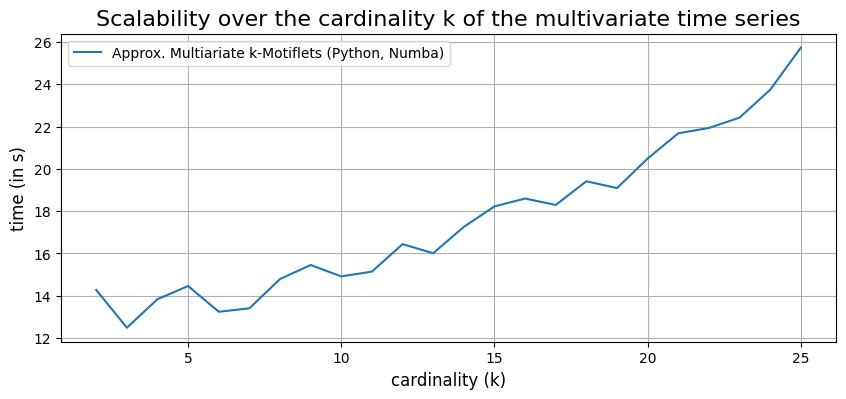

In [6]:
from scipy.ndimage.filters import gaussian_filter1d

plt.figure(figsize=(10,4))

#times_list= [None, None, 14.643555641174316, 13.6043860912323, 14.405737400054932, 13.841434717178345, 14.294211864471436, 14.785175800323486, 16.271373748779297, 15.656980991363525, 17.261473178863525, 17.113740921020508, 17.50573229789734, 17.494255781173706, 18.265917778015137, 18.607177019119263, 19.07263946533203, 19.89667534828186, 20.967764377593994, 21.966867446899414, 20.76865863800049, 21.910641193389893, 23.856654167175293, 24.583675861358643, 27.762978076934814]
times_list = [None, None, 14.275872468948364, 12.489547729492188, 13.838556289672852, 14.460891723632812, 13.243665933609009, 13.406863451004028, 14.79393720626831, 15.453687906265259, 14.91560959815979, 15.1437246799469, 16.440481662750244, 16.013614654541016, 17.259449005126953, 18.22551703453064, 18.598342418670654, 18.293434858322144, 19.414379596710205, 19.09253191947937, 20.49007773399353, 21.683790922164917, 21.935224056243896, 22.42333221435547, 23.74110698699951, 25.729482650756836]
print(len(times_list))
#ysmoothed = gaussian_filter1d(times_list, sigma=2)

plt.figure(figsize=(10,4))

k_all = list(range(2, 26))
k_all.insert(0, None)
k_all.insert(0, None)

plt.plot(k_all, times_list, label="Approx. Multiariate k-Motiflets (Python, Numba)")
plt.title("Scalability over the cardinality k of the multivariate time series", fontsize=16)
plt.ylabel('time (in s)', fontsize=12)
plt.xlabel('cardinality (k)', fontsize=12)
plt.legend()
plt.grid()
plt.savefig("../../Latex/BachelorarbeitFinal/Images/scale_k/scale.pdf", bbox_inches='tight', dpi=600)
plt.show()